In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education','education-num','marital-status',
       'occupation','relationship',
       'race','sex','capital-gain',
       'capital-loss','hours-per-week','native-country','Census Income']

adult = pd.read_csv('adult.data', header=None, names=columns)

1. How many males and females are there?

In [3]:
adult['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

2. What is the mean male age?

In [4]:
adult.groupby('sex')['age'].mean()[' Male']


39.43354749885268

3. What is the proportion of the US citizens?

In [5]:
us_perc = adult['native-country'].value_counts(normalize=True)[' United-States']
print("US citizens is {} % of all citiziens in the table".format(us_perc * 100))

US citizens is 89.5857006848684 % of all citiziens in the table


4. Plot the distribution of people’s education as a bar plot.

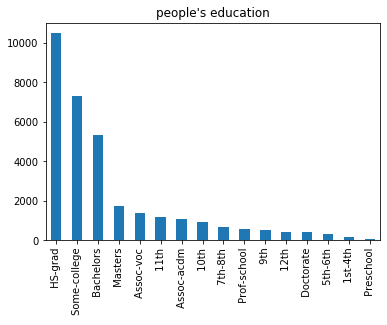

In [6]:
adult['education'].value_counts().plot.bar(title='people\'s education')

5. What is the mean and standard deviation of the ”final weight” for divorced people?


In [7]:
# adult.groupby('marital-status')['fnlwgt'].mean()[' Divorced']
adult.groupby('marital-status')['fnlwgt'].agg(['mean', 'std']).loc[' Divorced', :]

mean    185802.790457
std     105646.789459
Name:  Divorced, dtype: float64

6. Is it true that the people who receive over 50k are mostly highly educated?

In [8]:
rich_people = adult.groupby('Census Income')['education'].value_counts(normalize=True)[' >50K']
highly_educated = rich_people[[' Masters', ' Doctorate', ' Bachelors']].sum() * 100
print('Highly educated people are only {}% of all people recieving >50K'.format(highly_educated))
print(highly_educated > 50)

Highly educated people are only 44.45861497258003% of all people recieving >50K
False


7. What is the maximum male and female age for each race?


In [9]:
adult.groupby(['race', 'sex'])['age'].max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

8. The people from which countries work as farmers/fishers?

In [10]:
farming_fishing = adult[adult['occupation'] == ' Farming-fishing']
countries = farming_fishing['native-country'].unique()
print(countries[countries != ' ?'])

[' United-States' ' Cambodia' ' Poland' ' Guatemala' ' Mexico' ' England'
 ' Philippines' ' Italy' ' Puerto-Rico' ' Vietnam' ' Germany' ' Japan'
 ' Canada' ' Yugoslavia' ' Cuba' ' Portugal' ' El-Salvador' ' Hong'
 ' Ireland' ' France']


9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [11]:
human_b_m = adult.groupby('sex')['education'].value_counts()
male_ratio = human_b_m[' Male'][' Bachelors'] / human_b_m[' Male'][' Masters']
female_ratio = human_b_m[' Female'][' Bachelors'] / human_b_m[' Female'][' Masters']
print("male ratio: {} \nfemale ratio: {}".format(male_ratio, female_ratio))

male ratio: 3.14743049705139 
female ratio: 3.0205223880597014


10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?


1)Largest number of hours person works per week: 99
2)Number of people work this number of hours: 85
3)60 of 85 get <=50K and 25 get >50K


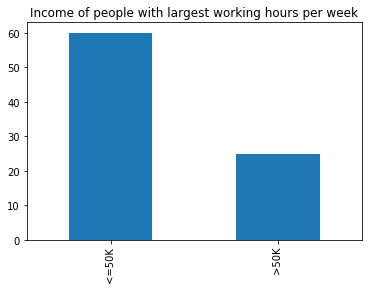

In [12]:
largest_hpw = adult['hours-per-week'].max()
print("1)Largest number of hours person works per week: {}".format(largest_hpw))

adults_lhpw = adult[adult['hours-per-week'] == largest_hpw]

num_of_people_lhpw = adults_lhpw['hours-per-week'].count()
print("2)Number of people work this number of hours: {}".format(num_of_people_lhpw))

human_income_lhpw = adults_lhpw['Census Income'].value_counts()
print("3){} of {} get <=50K and {} get >50K".format(human_income_lhpw[0], num_of_people_lhpw, human_income_lhpw[1]))
human_income_lhpw.plot.bar(title='Income of people with largest working hours per week')